<a href="https://colab.research.google.com/github/Janies-Garcia-Velasco/Optimizacion-no-lineal/blob/main/OC_OptNL_DIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de División de Intervalos por la mitad

**Oliver Cuate**

*19 de febrero de 2024*

---

En este cuadeno de trabajo se programa el método de División de Intervalos por la Mitad (DIM), además de introducir algunas herramientas útiles de Python.

## Creando funciones

En Python, una función es una rutina que recibe uno o más parámetros y regresa *(retun)* uno o más valores.

Como primer ejemplo, consideremos a la función

$$f(x) = (x-1)^2 + 3 $$

La cual llamaremos *problema1*

In [ ]:
# Creamos la función, x es el argumento que recibe
def problema1(x):
  return (x-1)**2 + 3   # return para regresar un valor

In [ ]:
# probamos la función
problema1(1.2)

3.04

# DIM

El método requiere una función, un intervalo $[a,b]$ y una tolerancia $\epsilon > 0$. Los pasos a seguir son los siguientes:

* **Paso 1:** Calcular $x_m = \dfrac{b-a}{2}$

In [ ]:
# esta función recibe una función, el limite inferior a
# el limite superior b y una tolerancia
def DIM( f, a, b, tol ):
  L = b - a
  xm = (b+a)/2
  fm = f(xm)

  while L > tol:
    x1 = a + L/4
    x2 = b - L/4

    f1 = f(x1)
    f2 = f(x2)

    if f1 < fm:
      b  = xm
      fb = fm
      xm = x1
      fm = f1
    elif f2 < fm:
      a  = xm
      fa = fm
      xm = x2
      fm = f2
    else:
      a  = x1
      fa = f1
      b  = x2
      fb = f2

    xm = (b+a)/2
    fm = f(xm)
    L  = b-a

  return xm, fm

In [ ]:
DIM( problema1, 0, 5, 0.001 )

(1.00006103515625, 3.0000000037252903)

In [ ]:
import numpy as np

def funcion2(x):
  return np.sin(x)

DIM( funcion2, -np.pi, np.pi, 0.001 )

(-1.5707963267948966, -1.0)

In [ ]:
-np.pi/2

-1.5707963267948966

In [ ]:
import matplotlib.pyplot as plt

xx = np.array( [-2, -1, 0, 1, 2] )
fx = problema1(xx)
print(fx)

[12  7  4  3  4]


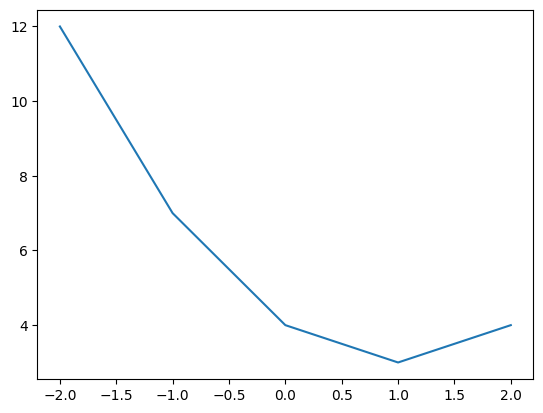

In [ ]:
plt.plot(xx, fx)

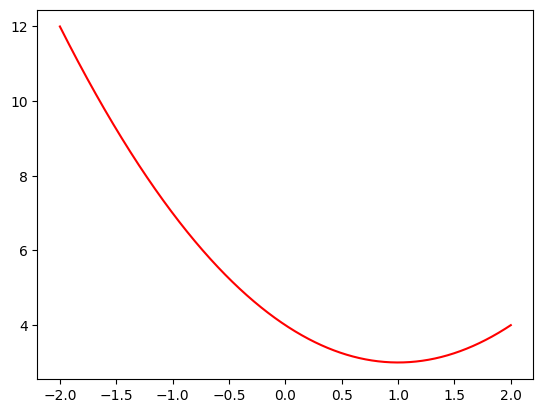

In [ ]:
xl = np.linspace( -2, 2, 1000 )
fl = problema1(xl)

plt.plot( xl, fl, 'red')

In [ ]:
# esta función recibe una función, el limite inferior a
# el limite superior b y una tolerancia
def DIM_g( f, a, b, tol ):
  L = b - a
  xm = (b+a)/2
  fm = f(xm)

  X = [xm]
  F = [fm]

  while L > tol:
    x1 = a + L/4
    x2 = b - L/4

    f1 = f(x1)
    f2 = f(x2)

    if f1 < fm:
      b  = xm
      fb = fm
      xm = x1
      fm = f1
    elif f2 < fm:
      a  = xm
      fa = fm
      xm = x2
      fm = f2
    else:
      a  = x1
      fa = f1
      b  = x2
      fb = f2

    xm = (b+a)/2
    fm = f(xm)
    L  = b-a

    X.append(xm)
    F.append(fm)

  return X, F

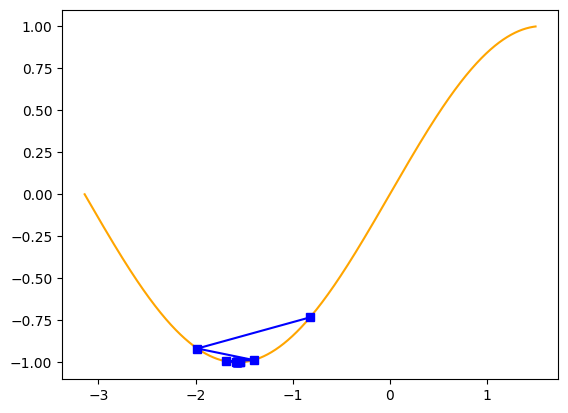

In [ ]:
X, F =  DIM_g( funcion2, -np.pi, 1.5, 0.001 )

xg = np.linspace(-np.pi, 1.5, 1000)
fg = funcion2(xg)

plt.plot(xg, fg,'orange')
plt.plot(X, F, '-sb')

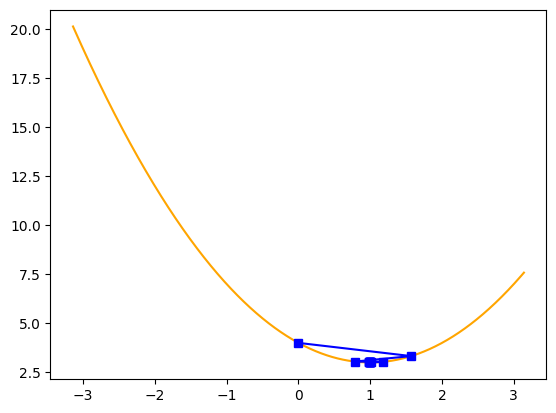

In [ ]:
X, F =  DIM_g( problema1, -np.pi, np.pi, 0.001 )

xg = np.linspace(-np.pi, np.pi, 1000)
fg = problema1(xg)

plt.plot(xg, fg,'orange')
plt.plot(X, F, '-sb')